In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# print(X_train.shape)
# X_test.shape

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.callbacks import History

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate


history_Adam = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_Adam, save_best_model])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.5464 - accuracy: 0.7523 - val_loss: 0.5171 - val_accuracy: 0.7908
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.5073 - accuracy: 0.7745 - val_

943/943 [==============================] - 2s 2ms/step - loss: 0.3281 - accuracy: 0.8483 - val_loss: 0.3291 - val_accuracy: 0.8466
Epoch 30/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3273 - accuracy: 0.8488 - val_loss: 0.3288 - val_accuracy: 0.8458
Epoch 31/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3272 - accuracy: 0.8489 - val_loss: 0.3284 - val_accuracy: 0.8470
Epoch 32/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3269 - accuracy: 0.8490 - val_loss: 0.3284 - val_accuracy: 0.8459
Epoch 33/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3267 - accuracy: 0.8486 - val_loss: 0.3283 - val_accuracy: 0.8483
Epoch 34/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3265 - accuracy: 0.8486 - val_loss: 0.3298 - val_accuracy: 0.8455
Epoch 35/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3265 - accuracy: 0.8487 - val_loss: 0.3279 - val_accuracy: 0.8469
Epoch

Epoch 62/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3239 - accuracy: 0.8494 - val_loss: 0.3262 - val_accuracy: 0.8473
Epoch 63/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3239 - accuracy: 0.8497 - val_loss: 0.3261 - val_accuracy: 0.8471
Epoch 64/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3239 - accuracy: 0.8499 - val_loss: 0.3262 - val_accuracy: 0.8471
Epoch 65/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3239 - accuracy: 0.8499 - val_loss: 0.3261 - val_accuracy: 0.8473
Epoch 66/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3239 - accuracy: 0.8498 - val_loss: 0.3261 - val_accuracy: 0.8475
Epoch 67/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3238 - accuracy: 0.8494 - val_loss: 0.3260 - val_accuracy: 0.8475
Epoch 68/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3238 - accuracy: 0.8498 - val_loss: 0.3261 - val_accuracy:

943/943 [==============================] - 1s 1ms/step - loss: 0.3236 - accuracy: 0.8499 - val_loss: 0.3259 - val_accuracy: 0.8473
Epoch 97/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3236 - accuracy: 0.8498 - val_loss: 0.3259 - val_accuracy: 0.8474
Epoch 98/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3236 - accuracy: 0.8499 - val_loss: 0.3259 - val_accuracy: 0.8473
Epoch 99/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3236 - accuracy: 0.8499 - val_loss: 0.3259 - val_accuracy: 0.8473
Epoch 100/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3235 - accuracy: 0.8499 - val_loss: 0.3259 - val_accuracy: 0.8473


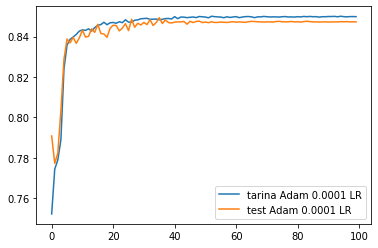

In [16]:
plt.plot(history_Adam.history['accuracy'], label = "tarina Adam 0.0001 LR")
plt.plot(history_Adam.history['val_accuracy'], label = "test Adam 0.0001 LR")


plt.legend()
plt.show()

In [14]:
model.load_weights("wagi_best.h5py")
model.evaluate(X_test,y_test)

OSError: Unable to open file (file signature not found)

# Zad.
Zapisz 3 modele z różnymi parametrami.